3. 尝试不同optimizer对模型进行训练，观察对比loss结果。

In [ ]:
# 导入数据集
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces # 导入Olivetti人脸数据集
from sklearn.model_selection import train_test_split # 导入训练测试数据集划分函数
from torch.utils.data import DataLoader # 导入数据加载器

In [9]:
# 加载数据集
faces_data = fetch_olivetti_faces(
    data_home="./face_data", shuffle=True
)  # 下载Olivetti人脸数据集
print(faces_data.DESCR)  # 打印数据集描述
print(faces_data.data.shape)  # 打印数据集大小
print(faces_data.target.shape)  # 打印数据集标签大小
print(faces_data.images.shape)  # 打印数据集图像大小

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [11]:
images = torch.tensor(faces_data.data)  # 将数据转换为张量
targets = torch.tensor(faces_data.target, dtype=torch.long)  # 将标签转换为张量

print(images.shape)  # 打印图像数据大小
print(targets.shape)  # 打印标签数据大小

dataset = [(img, lbl) for img, lbl in zip(images, targets)]  # 将数据集转换为列表形式
dataloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True) # 创建数据加载器
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # 检测是否有GPU可用

torch.Size([400, 4096])
torch.Size([400])


In [12]:
def get_model():
    model = nn.Sequential(
        nn.Linear(4096, 8192),  # 输入层到隐藏层
        nn.BatchNorm1d(8192),  # 批归一化层
        nn.ReLU(),  # 激活函数
        nn.Dropout(),  # Dropout层
        nn.Linear(8192, 16384),  # 隐藏层到隐藏层
        nn.BatchNorm1d(16384),  # 批归一化层
        nn.ReLU(),  # 激活函数
        nn.Dropout(),  # Dropout层
        nn.Linear(16384, 1024),  # 隐藏层到隐藏层
        nn.BatchNorm1d(1024),  # 批归一化层
        nn.ReLU(),  # 激活函数
        nn.Dropout(),  # Dropout层
        nn.Linear(1024, 40),  # 隐藏层到输出层
    ).to(

        device
    )  # 创建多层神经网络模型并将其移动到GPU上

    return model  # 返回模型

In [13]:
# 定义训练模型函数
def train_model(model, optimizer, optimizerName):
    model.train()  # 设置模型为训练模式
    #优化器
    criterion = nn.CrossEntropyLoss()  # 交叉熵损失函数

    # 训练模型
    loss_list = []  # 初始化损失列表

    for i in range(20):
        for img, lbl in dataloader:
            img, lbl = img.to(device), lbl.to(device)  # 将数据移动到GPU上
            result = model(img)  # 前向传播
            loss = criterion(result, lbl)  # 计算损失
            loss.backward()  # 反向传播
            optimizer.step()  # 更新参数
            optimizer.zero_grad()  # 清空梯度

            loss_list.append(loss.item())  # 记录损失
            print(
                f"optimizer: {optimizerName}, Epoch {i+1}, Loss: {loss.item():.4f}"
            )  # 打印损失

    return loss_list  # 返回损失列表

In [14]:
# 获取模型
model1 = get_model()  #
model2 = get_model()  #
model3 = get_model()  #

SGDOptimizer = optim.SGD(
    model1.parameters(), lr=0.01, momentum=0.9
)  # 随机梯度下降优化器

AdamOptimizer = optim.Adam(model2.parameters(), lr=0.001)  # Adam优化器

RMSpropOptimizer = optim.RMSprop(model3.parameters(), lr=0.001)  # RMSprop优化器

# 训练3个模型
sgd_loss_list = train_model(model1, SGDOptimizer, "SGD")  # 训练模型
ada_loss_list = train_model(model2, AdamOptimizer, "Adam")  # 训练模型
rms_loss_list = train_model(model3, RMSpropOptimizer, "RMSProp")  # 训练模型

optimizer: SGD, Epoch 1, Loss: 4.1391
optimizer: SGD, Epoch 1, Loss: 3.6374
optimizer: SGD, Epoch 1, Loss: 3.6447
optimizer: SGD, Epoch 1, Loss: 3.4304
optimizer: SGD, Epoch 1, Loss: 3.7807
optimizer: SGD, Epoch 1, Loss: 3.7853
optimizer: SGD, Epoch 1, Loss: 3.3768
optimizer: SGD, Epoch 1, Loss: 2.7727
optimizer: SGD, Epoch 1, Loss: 3.3965
optimizer: SGD, Epoch 1, Loss: 3.5981
optimizer: SGD, Epoch 1, Loss: 3.0041
optimizer: SGD, Epoch 1, Loss: 3.0342
optimizer: SGD, Epoch 1, Loss: 4.6499
optimizer: SGD, Epoch 1, Loss: 2.9749
optimizer: SGD, Epoch 1, Loss: 3.1942
optimizer: SGD, Epoch 1, Loss: 3.1212
optimizer: SGD, Epoch 1, Loss: 4.1943
optimizer: SGD, Epoch 1, Loss: 2.2772
optimizer: SGD, Epoch 1, Loss: 2.2770
optimizer: SGD, Epoch 1, Loss: 2.1026
optimizer: SGD, Epoch 1, Loss: 2.4673
optimizer: SGD, Epoch 1, Loss: 2.9089
optimizer: SGD, Epoch 1, Loss: 3.3276
optimizer: SGD, Epoch 1, Loss: 4.4629
optimizer: SGD, Epoch 1, Loss: 2.1617
optimizer: SGD, Epoch 1, Loss: 2.0122
optimizer: S

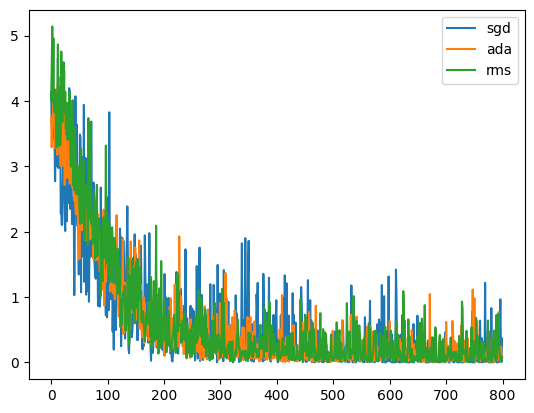

In [15]:
# 画图
plt.plot(range(len(sgd_loss_list)), sgd_loss_list, label="sgd")
plt.legend()
plt.plot(range(len(ada_loss_list)), ada_loss_list, label="ada")
plt.legend()
plt.plot(range(len(rms_loss_list)), rms_loss_list, label="rms")
plt.legend()

plt.show()